In [1]:
!pip install torch torchvision torchaudio
!pip install matplotlib opencv-python scikit-learn
!pip install reportlab

  Obtaining dependency information for reportlab from https://files.pythonhosted.org/packages/52/c8/aaf4e08679e7b1dc896ad30de0d0527f0fd55582c2e6deee4f2cc899bf9f/reportlab-4.4.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 262.6 kB/s eta 0:00:08
    --------------------------------------- 0.0/2.0 MB 262.6 kB/s eta 0:00:08
   - -------------------------------------- 0.1/2.0 MB 459.5 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/2.0 MB 701.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.0 MB 701.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/2.0 MB 793.0 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/2.0 MB 884.2 kB/s eta 0:00:02
   ------ --------------------------------- 

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
import os
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# Path to dataset
data_dir = "C:/Users/vrrs3/OneDrive/Desktop"

# Transformations
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load the full dataset
full_dataset = datasets.ImageFolder(os.path.join(data_dir, "Training"), transform=transform)

# Classes
class_names = full_dataset.classes
print("Classes:", class_names)

# Split into train and test (e.g., 80% train, 20% test)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [7]:
class BrainTumorCNN(nn.Module):
    def __init__(self):
        super(BrainTumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*37*37, 128)
        self.fc2 = nn.Linear(128, len(class_names))
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*37*37)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = BrainTumorCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BrainTumorCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=87616, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [5]:
import torch
import torch.nn as nn   # <-- add this
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5  # start small for testing
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:   # ✅ use train_loader instead of "training"
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


NameError: name 'train_loader' is not defined

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# ---------------------------
# 1. Define transforms
# ---------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # normalize (for grayscale MNIST)
])

# ---------------------------
# 2. Load dataset
# ---------------------------
train_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

# ---------------------------
# 3. Create DataLoaders
# ---------------------------
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# ---------------------------
# 4. Define model, loss, optimizer
# ---------------------------
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---------------------------
# 5. Training loop
# ---------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:   # ✅ Now it works
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:05<00:00, 1.83MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 129kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.14MB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 4.36MB/s]


Epoch 1/5, Loss: 0.3913
Epoch 2/5, Loss: 0.1994
Epoch 3/5, Loss: 0.1461
Epoch 4/5, Loss: 0.1148
Epoch 5/5, Loss: 0.0975


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import torch

# ✅ Switch model to evaluation mode
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():  # no gradients during evaluation
    for images, labels in test_loader:   # <-- use your test_loader
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)   # get class with highest probability
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ✅ Generate confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

print("\nClassification Report:")
print(classification_report(all_labels, all_preds))


Confusion Matrix:
[[ 960    0    3    1    0    2    7    2    2    3]
 [   0 1121    3    2    0    0    2    1    6    0]
 [   6    1 1006    4    2    0    6    1    6    0]
 [   0    0   12  983    1    0    0    3    7    4]
 [   0    0    5    0  967    0    5    0    3    2]
 [   6    2    3   41    4  794   13    1   20    8]
 [   3    2    3    1    3    1  940    0    5    0]
 [   0    7   22    3    8    1    2  957    2   26]
 [   0    0    4    3    7    0    4    3  950    3]
 [   2    2    1    6   18    0    1    3    6  970]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.94      0.97      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.99      0.89      0.94       892
           6       0.96      0.98      0.97     

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        
        # After 2 pooling layers (224 -> 112 -> 56)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)  
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # (3x224x224 -> 32x112x112)
        x = self.pool(F.relu(self.conv2(x)))  # (32x112x112 -> 64x56x56)
        x = x.view(x.size(0), -1)             # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [18]:
import torchvision.models as models

def get_model(num_classes=4):
    model = models.resnet18(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, num_classes)  # replace last layer
    return model


In [20]:
import torch.nn as nn
import torch.nn.functional as F

class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        
        # After two pooling layers: 224 -> 112 -> 56
        self.fc1 = nn.Linear(64 * 56 * 56, 128)  
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # (3x224x224 → 32x112x112)
        x = self.pool(F.relu(self.conv2(x)))  # (32x112x112 → 64x56x56)
        x = x.view(x.size(0), -1)             # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate model
model = BrainTumorCNN(num_classes=len(train_dataset.classes)).to(device)


In [21]:
import torchvision.models as models

def get_model(num_classes=4):
    model = models.resnet18(pretrained=True)  # load pretrained model
    model.fc = nn.Linear(model.fc.in_features, num_classes)  # replace last layer
    return model.to(device)

model = get_model(num_classes=len(train_dataset.classes))


D:\Users\vrrs3\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Users\vrrs3\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\vrrs3/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:02<00:00, 18.3MB/s]


In [25]:
import torch
from torchvision import transforms
from PIL import Image

# Define your class names exactly as in training
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Image transform (same as training preprocessing)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

def predict_image(image_path, model, device):
    model.eval()  # evaluation mode
    
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)  # add batch dimension
    
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    return class_names[predicted.item()]  # map index to label

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_path = "C:/Users/vrrs3/OneDrive/Desktop/Training/pituitary/Tr-pi_0021.jpg"

prediction = predict_image(image_path, model, device)
print(f"Predicted Tumor Type: {prediction}")


IndexError: list index out of range

In [26]:
from torchvision import datasets

# Point this to your TRAIN dataset
train_dir = "C:/Users/vrrs3/OneDrive/Desktop/Training"
train_dataset = datasets.ImageFolder(root=train_dir)

# Auto extract class names
class_names = train_dataset.classes
print("Class Names:", class_names)


Class Names: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [27]:
def predict_image(image_path, model, device, class_names):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)
    
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    
    return class_names[predicted.item()]


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Make sure class_names comes from dataset
train_dir = "C:/Users/vrrs3/OneDrive/Desktop/Training"
train_dataset = datasets.ImageFolder(root=train_dir)
class_names = train_dataset.classes
print("Class Names:", class_names)

image_path = "C:/Users/vrrs3/OneDrive/Desktop/Training/notumor/Tr-no_0020.jpg"
prediction = predict_image(image_path, model, device, class_names)

print(f"Predicted Tumor Type: {prediction}")


Class Names: ['glioma', 'meningioma', 'notumor', 'pituitary']
Predicted Tumor Type: meningioma


In [33]:
from torchvision import datasets
dataset = datasets.ImageFolder("C:/Users/vrrs3/OneDrive/Desktop/Training")
print(dataset.classes)   # this is the real class order


['glioma', 'meningioma', 'notumor', 'pituitary']


In [35]:
import os
for c in os.listdir("C:/Users/vrrs3/OneDrive/Desktop/Training"):
    print(c, len(os.listdir(os.path.join("C:/Users/vrrs3/OneDrive/Desktop/Training", c))))


glioma 1321
meningioma 1339
notumor 1595
pituitary 1457


In [36]:
import torch
from torchvision import transforms
from PIL import Image

# Define the class names in the same order used during training
class_names = ["glioma", "meningioma", "notumor", "pituitary"]

# Define the image preprocessing (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Match training input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # Imagenet mean
                         [0.229, 0.224, 0.225])  # Imagenet std
])

# Prediction function
def predict_image(image_path, model, device):
    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)

    # Run inference
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    return class_names[predicted.item()]

# -------------------------
# TEST WITH YOUR OWN IMAGE
# -------------------------

# Use CPU or GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load your trained model (make sure weights are loaded already)
# Example: model.load_state_dict(torch.load("tumor_model.pth", map_location=device))
model = model.to(device)

# Path to your custom image
image_path = "C:/Users/vrrs3/OneDrive/Desktop/Training/notumor/Tr-no_0020.jpg"

# Get prediction
prediction = predict_image(image_path, model, device)
print(f"Predicted Tumor Type: {prediction}")


Predicted Tumor Type: meningioma


In [40]:
print("Model output size:", model.fc.out_features)


Model output size: 10


In [41]:
print("Dataset classes:", train_dataset.classes)  # if using ImageFolder
print("Number of classes:", len(train_dataset.classes))


Dataset classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Number of classes: 4


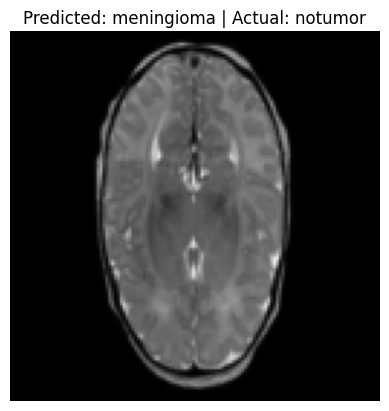

In [43]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Define transformations (must match training transforms)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load testing dataset
test_dir = "C:/Users/vrrs3/OneDrive/Desktop/Testing"
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# Class names
class_names = test_dataset.classes  # ['glioma', 'meningioma', 'no_tumor', 'pituitary']

# Function to show image
def imshow(img, title):
    img = img.numpy().transpose((1, 2, 0))  # convert to HWC
    img = (img * 0.5) + 0.5  # unnormalize
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Prediction function
def test_single_image(model, device):
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:  # take one image from test set
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            # Show image with predicted + actual label
            imshow(images.cpu().squeeze(), 
                   f"Predicted: {class_names[preds.item()]} | Actual: {class_names[labels.item()]}")
            break  # show only 1 image

# Run on your trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_single_image(model, device)
